In [9]:
round(4.00000, 5)

4.0

### TO DO

1. Edit local WTA network rule so that it goes by input, not activation.
2. Set up parameter sweep for g_x, g_w, and noise level.

In [3]:
import numpy as np

x = np.array([
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]
    ])

x.nonzero()

(array([0, 2, 4]), array([4, 1, 0]))

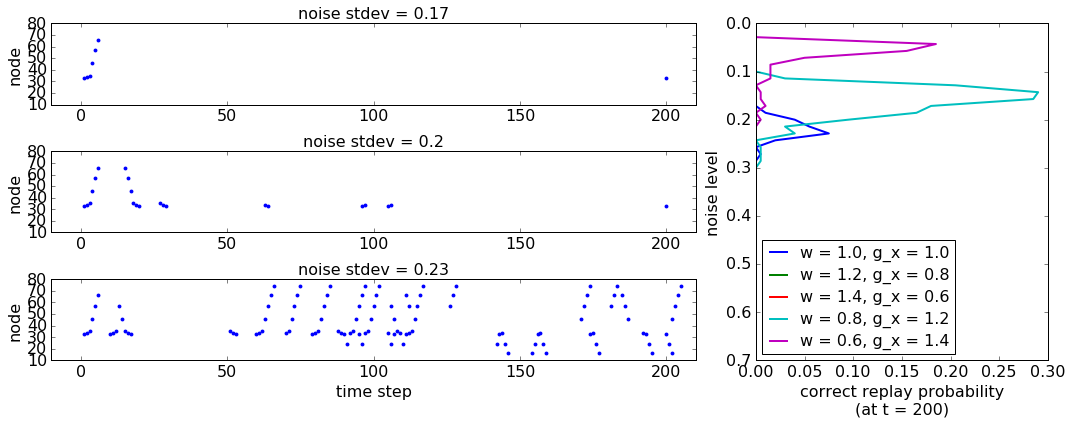

In [14]:
%matplotlib inline
import numpy as np
from figures.final_paper import extended_replay_noise_dependence as f

f(
    SEEDS_EXAMPLE=(0, 7, 0), NOISES_EXAMPLE=(0.17, 0.2, 0.23),
    SEED_STATS=0, NOISES_STATS=np.linspace(0, 0.7, 50), N_TRIALS=200,
    D=6, W=1, TH=1.5, G_X=1, T_X=60, RP=2,
    WS_STATS=[1, 1.2, 1.4, 0.8, 0.6], G_XS_STATS=[1., 0.8, 0.6, 1.2, 1.4],
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    REPLAY_TRIGGER=200,
    DRIVE_AMP=2);

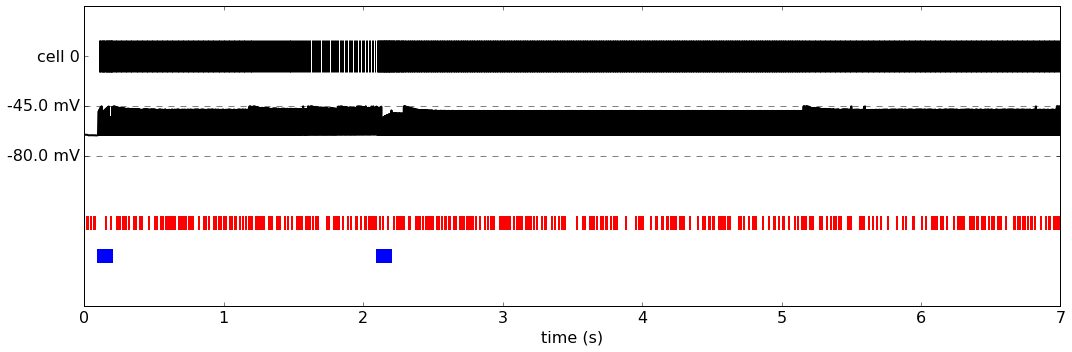

In [63]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

from network import LIFExponentialSynapsesModel
from plot import set_fontsize

W_MM = .125

ws = {'ampa': np.zeros((1, 1)), 'nmda': W_MM * np.ones((1, 1)), 'gaba': np.zeros((1, 1))}
v_rests = np.array([-0.065])
taus_m = np.array([0.020])
v_ths = np.array([-0.045])
v_resets = np.array([-0.065])
refrac_pers = np.array([0.002])

taus_syn = {'ampa': 0.002, 'nmda': 0.08, 'gaba': 0.005}
v_revs_syn = {'ampa': 0, 'nmda': 0, 'gaba': -0.08}

ntwk = LIFExponentialSynapsesModel(
    v_rests=v_rests, taus_m=taus_m, v_ths=v_ths, v_resets=v_resets, refrac_pers=refrac_pers,
    taus_syn=taus_syn, v_revs_syn=v_revs_syn, ws=ws)

dt = 0.001
dur = 7
n_steps = int(dur/dt)
drives = {key: np.zeros((n_steps, 1)) for key in taus_syn.keys()}

drives['ampa'][int(.1/dt):int(.2/dt), 0] = 1
drives['ampa'][int(2.1/dt):int(2.2/dt), 0] = 1

drives['gaba'][:, 0] = .1 * (np.random.rand(n_steps) < .06).astype(float)

initial_conditions = {
    'voltages': v_rests.copy(),
    'conductances': {syn: np.array([0.]) for syn in taus_syn.keys()},
    'refrac_ctrs': np.zeros((1,)),
}

measurements = ntwk.run(initial_conditions, drives, dt, record=['voltages', 'spikes'])

ts = np.arange(len(measurements['voltages']) - 1) * dt

fig, ax = plt.subplots(1, 1, figsize=(15, 5), tight_layout=True)

y_ticks = []
y_tick_labels = []

offset = 0

# plot drives
m = 1 / (ws.values()[0].shape[0])
b = 0

colors = {'ampa': 'b', 'nmda': 'g', 'gaba': 'r'}
for ctr, syn in enumerate(['ampa', 'nmda', 'gaba']):
    
    drive_times, drive_idxs = drives[syn][:-1].nonzero()
    
    ax.scatter(
        drive_times * dt, m * drive_idxs + b + offset + ctr / 3,
        s=200, marker='|', color=colors[syn], lw=2)
    

# plot voltages
offset += 2
ax.axhline(0 + offset, color='gray', ls='--')
ax.axhline(1 + offset, color='gray', ls='--')

y_ticks.extend([0 + offset, 1 + offset])
y_tick_labels.extend(
    ['{} mV'.format(v_revs_syn['gaba'] * 1000), '{} mV'.format(v_ths[0] * 1000)])

m = 1 / (v_ths[0] - v_revs_syn['gaba'])
b = -m * v_revs_syn['gaba']

ax.plot(ts, m * measurements['voltages'][:-1] + b + offset, color='k', lw=2)

# plot spikes
offset += 2
spike_times, spike_idxs = measurements['spikes'][:-1].nonzero()

m = 1 / (ws.values()[0].shape[0])
b = 0

y_ticks.append(offset)
y_tick_labels.append('cell 0')

ax.scatter(spike_times * dt, m * spike_idxs + b + offset, marker='|', s=1000, c='k', lw=1)

ax.set_xlim(ts[0], ts[-1])
ax.set_xlabel('time (s)')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

set_fontsize(ax, 16)

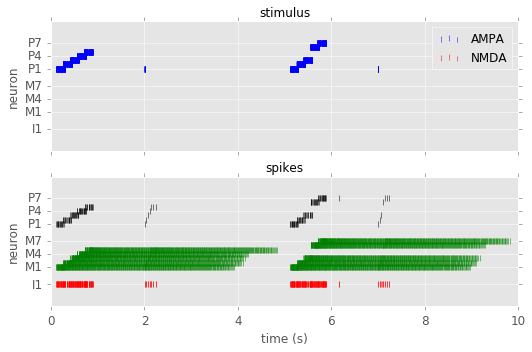

In [23]:
%matplotlib inline
from figures.cosyne import toy_network_lif

toy_network_lif(
    SEED=0, DT=0.0001, OFFSET=5,
    W_PP=.7, W_PM=0.03, W_PI=20, W_MP=25, W_MM=.14, W_IP=20,
    TAU_P=0.02, TAU_M=0.02, TAU_I=0.01,
    V_REST_P=-0.065, V_REST_M=-0.065, V_REST_I=-0.065,
    V_TH_P=-0.045, V_TH_M=-0.045, V_TH_I=-0.045,
    V_RESET_P=-0.065, V_RESET_M=-0.065, V_RESET_I=-0.065,
    RP_P=0.002, RP_M=0.002, RP_I=0.002,
    TAUS_SYN={'ampa': 0.002, 'nmda': 0.08, 'gaba': 0.005},
    V_REVS_SYN={'ampa': 0, 'nmda': 0, 'gaba': -0.08},
    SEQ_START=0.1, SEQ_DUR=0.2, SEQ_STAGGER=0.15, SEQ_AMP=10, SEQ_FREQ=500,
    REPLAY_START=2, REPLAY_DUR=0.01, REPLAY_AMP=1, REPLAY_FREQ=1000,
    RESET_START=3, RESET_DUR=0.2, RESET_AMP=0, RESET_FREQ=1000,
    BKGD_GABA_AMP=2, BKGD_GABA_FREQ=1000,
    BKGD_GABA_AMP_MEM=0, BKGD_GABA_FREQ_MEM=60);

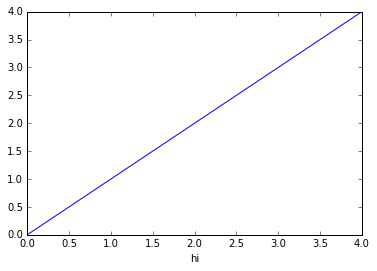

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt;
import numpy as np

fig, ax = plt.subplots(1, 1)

ax.plot(range(5))
ax.set_xlabel('hi')